In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from filters import low_pass_filter, high_pass_filter, denoise_signal, sinewave_shift, drop_data, count_peaks
import pandas as pd
import pyarrow.parquet as pq
import os
from visualization import plot_phase_time, plot_specto, plot_phase_sample, plot_wavelet, save_specto

In [3]:
# Import the traing dataset into a pandas dataframe (takes 1-2 minutes)
train = pq.read_pandas('data/train.parquet').to_pandas()

In [4]:
train.info();
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 8712 entries, 0 to 8711
dtypes: int8(8712)
memory usage: 6.5 GB


,0,1,2,3,4,5,6,7,8,9,...,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711
0,18,1,-19,-16,-5,19,-15,15,-1,-16,...,18,-22,12,8,13,6,-21,-15,-9,20
1,18,0,-19,-17,-6,19,-17,16,0,-15,...,17,-21,12,8,14,7,-19,-15,-8,21
2,17,-1,-20,-17,-6,19,-17,15,-3,-15,...,16,-21,13,8,15,8,-18,-14,-8,22
3,18,1,-19,-16,-5,20,-16,16,0,-15,...,16,-21,12,8,15,8,-19,-14,-7,23
4,18,0,-19,-16,-5,20,-17,16,-2,-14,...,17,-22,12,8,15,8,-18,-14,-8,23


In [5]:
# Import the training metadata from csv
train_meta = pd.read_csv('data/metadata_train.csv')
train_meta.head(10)

,signal_id,id_measurement,phase,target
0,0,0,0,0
1,1,0,1,0
2,2,0,2,0
3,3,1,0,1
4,4,1,1,1
5,5,1,2,1
6,6,2,0,0
7,7,2,1,0
8,8,2,2,0
9,9,3,0,0


In [6]:
train_meta_pd = train_meta[train_meta['target'] == 1]

In [7]:
train_meta_pd

,signal_id,id_measurement,phase,target
3,3,1,0,1
4,4,1,1,1
5,5,1,2,1
201,201,67,0,1
202,202,67,1,1
228,228,76,0,1
229,229,76,1,1
230,230,76,2,1
270,270,90,0,1
271,271,90,1,1


In [64]:
signal_id = 201

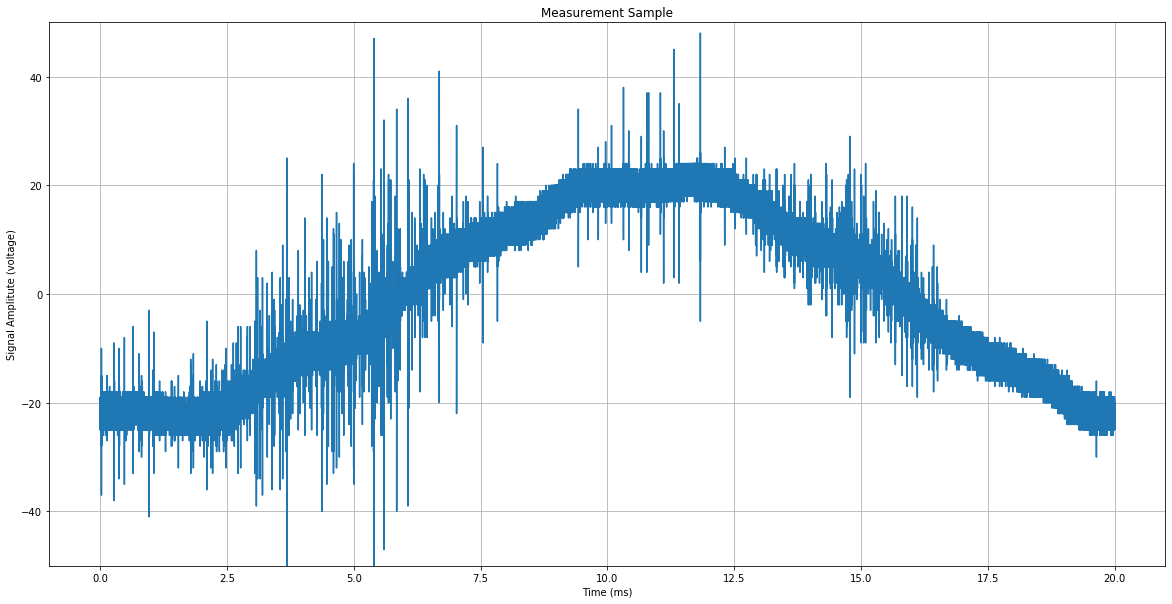

In [65]:
plot_phase_time(train[str(signal_id)])

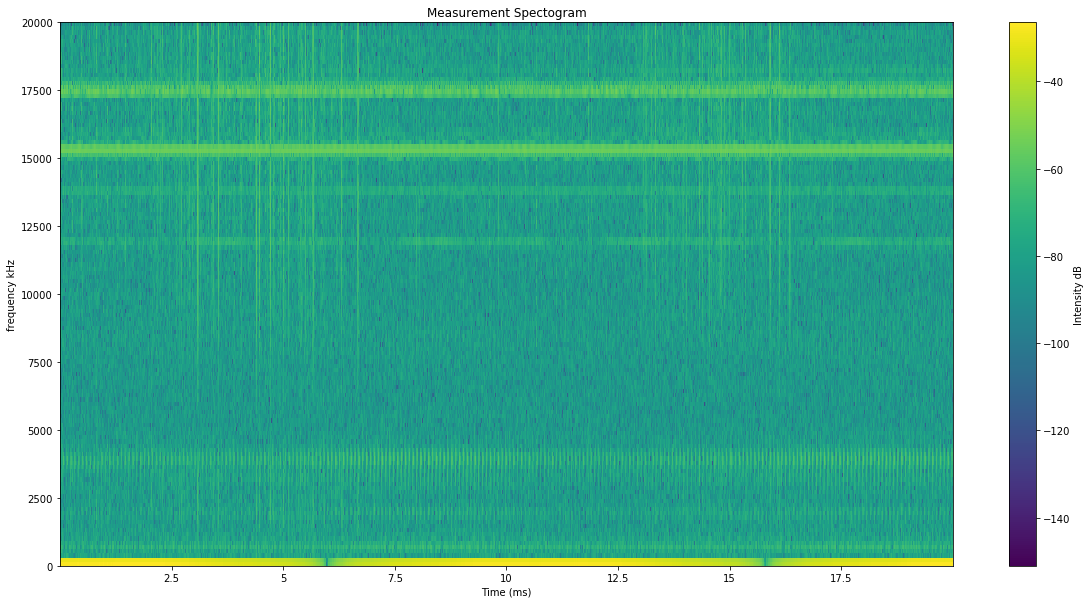

In [66]:
plot_specto(train[str(signal_id)])

In [67]:
new_wave, cutpoint = sinewave_shift(train[str(signal_id)])

In [68]:
def plot_original_and_denoised(data):
    non_filtered_signal = data
    hp_filtered_signal = high_pass_filter(non_filtered_signal)
    denoised_sig = denoise_signal(hp_filtered_signal)
    
    plot_phase_time(non_filtered_signal)
    plot_phase_time(denoised_sig)
    
    return hp_filtered_signal, denoised_sig

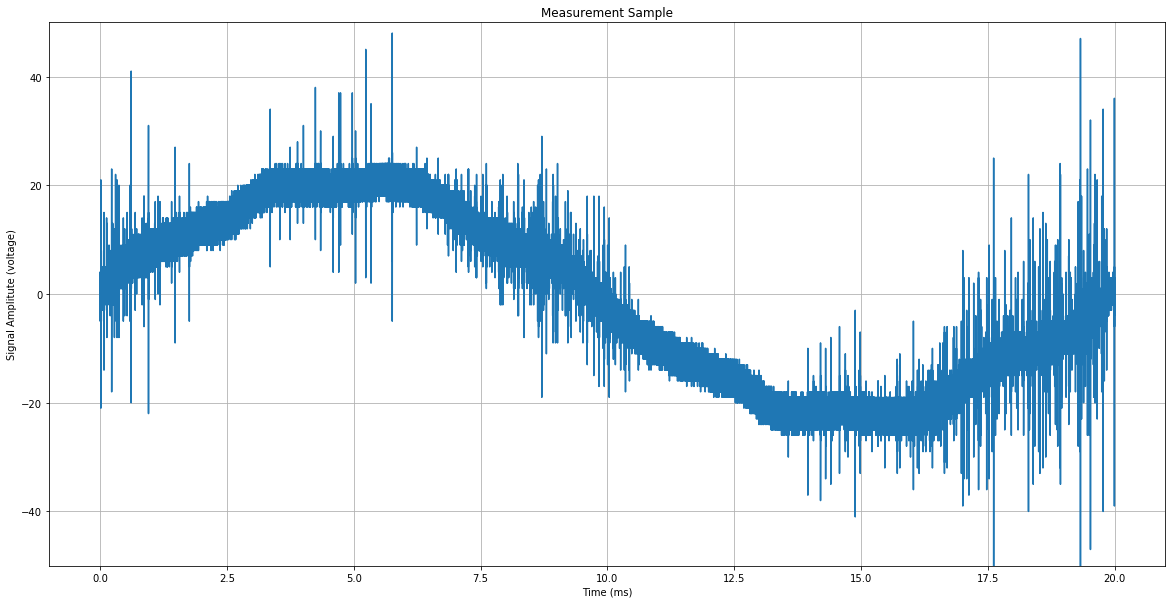

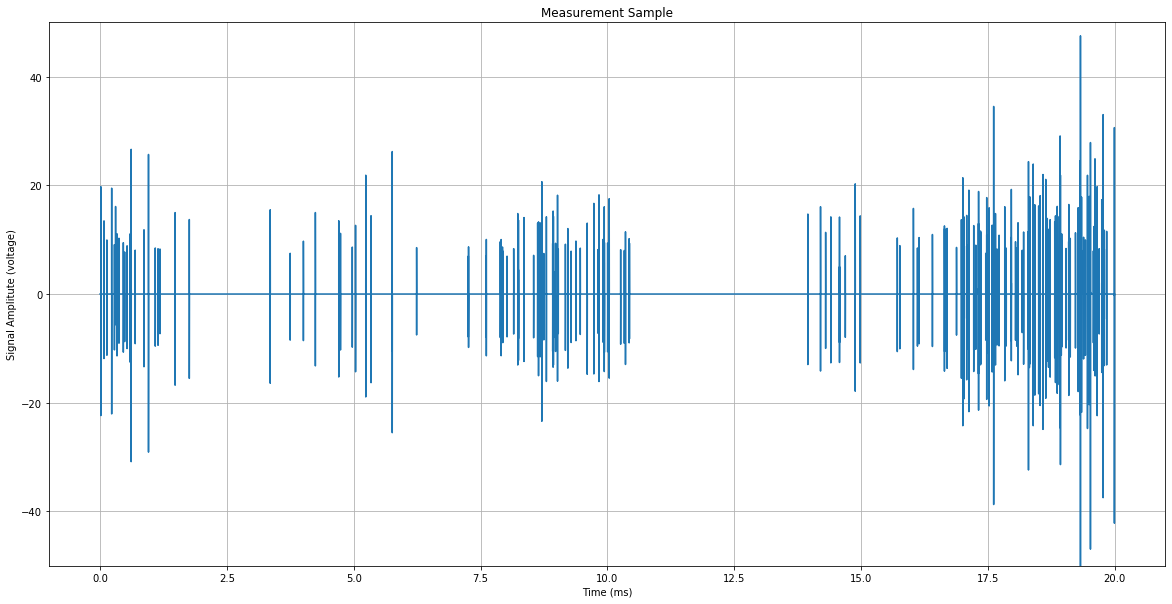

In [69]:
hp_filtered_signal, denoised_sig = plot_original_and_denoised(new_wave)

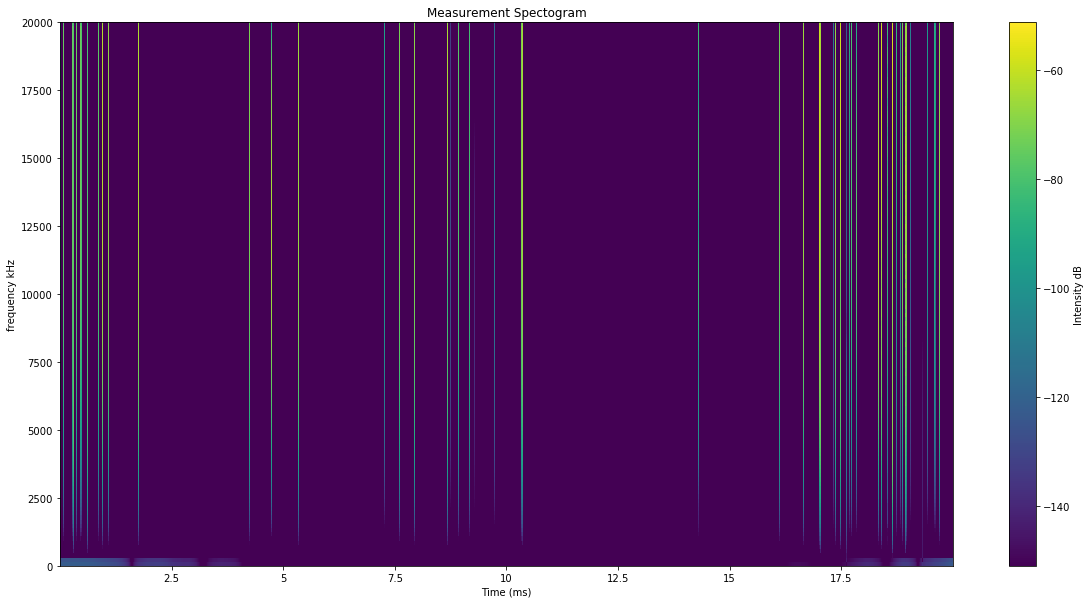

In [70]:
plot_specto(denoised_sig)

In [71]:
cut_data = drop_data(denoised_sig)

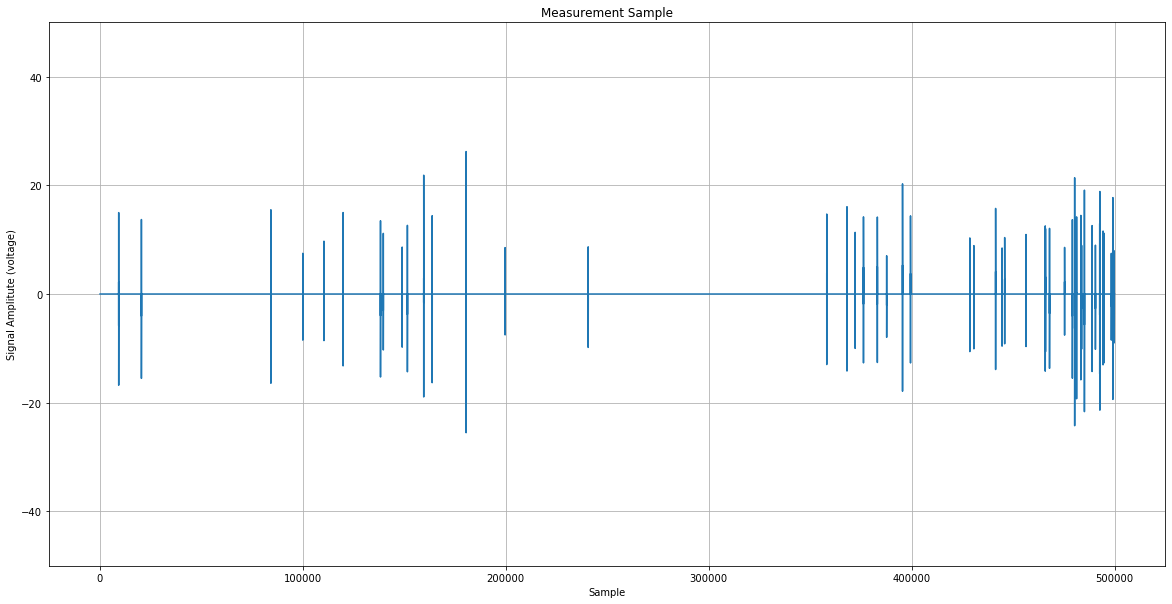

In [72]:
plot_phase_sample(cut_data)

In [73]:
count_peaks(cut_data, threshold=1)

253

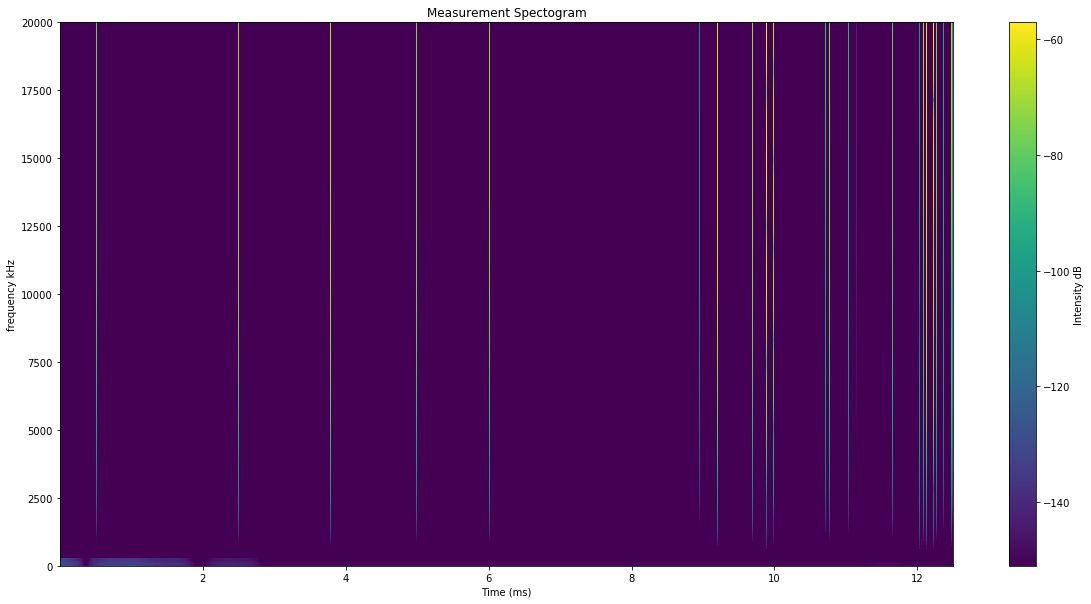

In [74]:
plot_specto(cut_data)

In [75]:
save_specto(cut_data, filepath='experiments', filename='test_saved_spectogram.png')